In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.preprocessing import StandardScaler

##Decision tree


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class08/drug200.csv')

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
x = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = np.array(data['Drug'])

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
scaler = StandardScaler()

In [ ]:
Tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=10)

In [ ]:
model = Tree.fit(train_x,train_y)
pred = model.predict(test_x)

[Text(0.625, 0.9, 'X[1] <= 14.829\nentropy = 1.915\nsamples = 160\nvalue = [17, 13, 10, 45, 75]'),
 Text(0.5, 0.7, 'X[4] <= 0.5\nentropy = 1.728\nsamples = 85\nvalue = [17, 13, 10, 45, 0]'),
 Text(0.25, 0.5, 'X[5] <= 0.5\nentropy = 0.684\nsamples = 55\nvalue = [0, 0, 10, 45, 0]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]'),
 Text(0.375, 0.3, 'X[7] <= 0.5\nentropy = 0.961\nsamples = 26\nvalue = [0, 0, 10, 16, 0]'),
 Text(0.25, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.625, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples = 75\nvalue = [0, 0, 0, 0, 75]')]

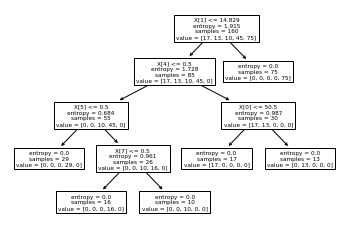

In [ ]:
from sklearn import tree
tree.plot_tree(Tree)

In [ ]:
print(tree.export_text(Tree))

|--- feature_1 <= 14.83
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: drugX
|   |   |--- feature_5 >  0.50
|   |   |   |--- feature_7 <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- feature_7 >  0.50
|   |   |   |   |--- class: drugC
|   |--- feature_4 >  0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: drugB
|--- feature_1 >  14.83
|   |--- class: drugY



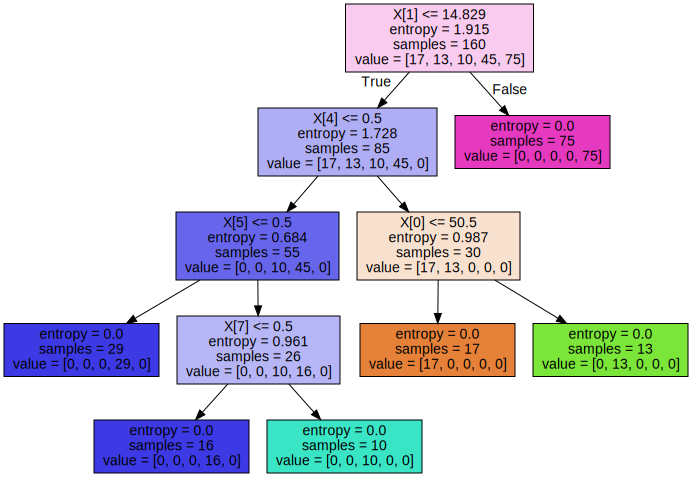

In [ ]:
import graphviz
dot_data = tree.export_graphviz(Tree, out_file=None,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 938 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=8dcd03ac8613cbec3b3b2213cf1230083513e7bad9825c5dc02204da89f0a4dc
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


##LogisticRegression

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
data = pd.read_csv('https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class07/advertising.csv')
data.head()
x = np.array(data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']])
y = np.array(data['Clicked on Ad'])
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=10)
scaler = StandardScaler()
sc_x = scaler.fit_transform(train_x)
model = LogisticRegression()
model.fit(train_x,train_y)
pred = model.predict(scaler.transform(test_x))
print(confusion_matrix(test_y, pred))
sum(pred==test_y)

[[83 13]
 [20 84]]


167

##KNN

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class07/advertising.csv')

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]])
Y = np.array(data["Clicked on Ad"])
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
sc_train_x = scaler_x.fit_transform(train_x)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(sc_train_x,train_y)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
sc_test_x = scaler_x.transform(test_x)
y_hat = knn.predict(sc_test_x)
print(confusion_matrix(test_y, y_hat))
print(knn.score(sc_test_x, test_y))

[[93  3]
 [ 9 95]]
0.94


train_score: [1.0, 0.97, 0.97375, 0.97, 0.97125, 0.96625, 0.96875, 0.9675, 0.96875, 0.965, 0.9675, 0.96625, 0.96875, 0.96625, 0.9675, 0.965, 0.96625, 0.96625, 0.9675, 0.9675]
test_score: [0.93, 0.955, 0.955, 0.95, 0.94, 0.945, 0.935, 0.935, 0.935, 0.945, 0.945, 0.945, 0.945, 0.95, 0.945, 0.945, 0.94, 0.95, 0.945, 0.945]


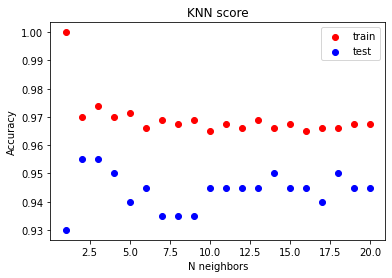

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sc_train_x, train_y)
    train_score.append(knn.score(sc_train_x, train_y))
    test_score.append(knn.score(sc_test_x, test_y))

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

x_axis = np.arange(1,21,1)
plt.scatter(x_axis, np.array(train_score), color="r", label="train")
plt.scatter(x_axis, np.array(test_score), color="b", label="test")
plt.title("KNN score")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()